在这个练习中，我们使用电信企业的客户流失数据集，Orange_Telecom_Churn_Data.csv（存放在当前目录下）。我们先读入数据集，做一些数据预处理，然后使用各种模型根据用户的特点来预测其是否会流失。

## 第一步：读入和处理数据
* 读入数据集，并查看其基本信息。
* 去除其中对预测无用的列，如“state"，"area_code"和"phone_number"
* 把'intl_plan'和'voice_mail_plan'两列的值转换成布尔类型：'yes'替换成'True'，'no'替换成'False’

In [2]:
# 读入数据集，并查看其基本信息
import pandas as pd
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [3]:
# 去除“state"，"area_code"和"phone_number"三列
data.drop(columns=['state', 'area_code', 'phone_number'], inplace=True)

In [4]:
# 把'intl_plan'和'voice_mail_plan'两列的值转换成布尔类型
data['intl_plan'] = data['intl_plan'].astype('bool')
data['voice_mail_plan'] = data['voice_mail_plan'].astype('bool')

data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,True,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,True,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,True,True,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,True,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,True,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 第二步：生成X和y
* 将"churned"列之外的所有列作为X, "churned"列作为y
* 检查y列中所有类别的个数
* 划分成训练集和测试集
* 分别检查训练集和测试集中所有类别的个数

In [5]:
# 生成X和y
X = data.drop(columns='churned')
y = data['churned']

In [6]:
# 检查y中所有类别的个数
y.value_counts()

churned
False    4293
True      707
Name: count, dtype: int64

In [7]:
# 划分成训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# 分别检查训练集和测试集中所有类别的个数
print(y_test.value_counts())
print(y_train.value_counts())

churned
False    1089
True      161
Name: count, dtype: int64
churned
False    3204
True      546
Name: count, dtype: int64


## 第三步：随机森林
* 将决策树个数设置为一个范围内的多个不同的值，分别训练出不同的随机森林，并计算每个森林的袋外错误
* 将袋外错误作为决策树个数的函数，绘制在一张图上
* 使用带交叉验证的网格搜索自动为随机森林模型搜索一个最佳决策树个数
* 预测测试数据，并输出其精度、查准率、查全率和F1分数

In [9]:
# 将决策树的个数设置为一个范围内的多个不同的值，分别训练出不同的随机森林，并计算每个森林的袋外错误
from sklearn.ensemble import RandomForestClassifier

nsimu = 21
error_rate = [0]*nsimu
ntree = [0]*nsimu
for i in range(1, nsimu):
    rfc = RandomForestClassifier(n_estimators=i*10, min_samples_split=10, max_depth=None, criterion='gini', oob_score=True)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate[i] = 1 - rfc.oob_score_
    ntree[i] = i*10

d:\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0, 0.5, 'oob_score')

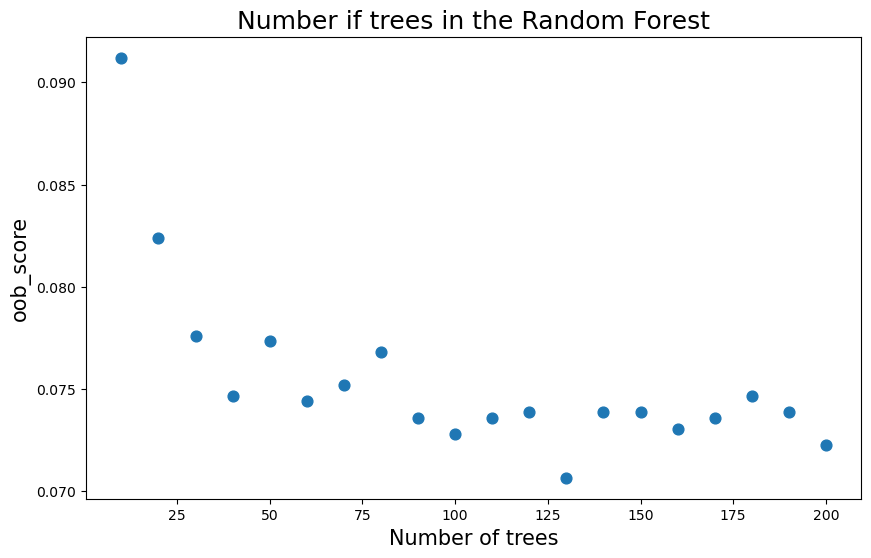

In [11]:
# 将袋外错误作为决策树个数的函数，绘制在一张图上
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x=ntree[1:nsimu], y=error_rate[1:nsimu], s=60)
plt.title('Number if trees in the Random Forest', fontsize=18)
plt.xlabel('Number of trees', fontsize=15)
plt.ylabel('oob_score', fontsize=15)

In [12]:
# 使用带交叉验证的网格搜索自动为随机森林模型搜索一个最佳决策树个数
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': range(175, 200)}
grid = GridSearchCV(rfc, param_grid=param_grid, cv=14, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 181}

In [13]:
# 预测测试数据
rfc_new = RandomForestClassifier(n_estimators=181, min_samples_split=10, max_depth=None, criterion='gini')

rfc_new.fit(X_train, y_train)

rfc_new_pred = rfc_new.predict(X_test)

In [14]:
# 输出测试集上预测结果的精度、查准率、查全率和F1分数
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, rfc_new_pred)
cr = classification_report(y_test, rfc_new_pred)
print("Accurracy of prediction:", round((cm[0,0]+cm[1,1])/cm.sum(), 3))
print(cr)

Accurracy of prediction: 0.938
              precision    recall  f1-score   support

       False       0.94      1.00      0.97      1089
        True       0.96      0.54      0.69       161

    accuracy                           0.94      1250
   macro avg       0.95      0.77      0.83      1250
weighted avg       0.94      0.94      0.93      1250



## 第四步：AdaBoost
* 使用带交叉验证的网格搜索训练一个最佳的AdaBoost模型，可以尝试调节参数：树的个数、学习率等
* 预测测试数据，并输出其精度、查准率、查全率和F1分数

In [15]:
# 使用带交叉验证的网格搜索训练一个最佳的AdaBoost模型，可以尝试调节参数：树的个数、学习率
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': range(100, 601, 100), 'learning_rate': [0.1, 0.3, 0.5, 0.7]}
treecla = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=1,
                                 random_state=1)
ada = AdaBoostClassifier(base_estimator=treecla, random_state=1)

grid = GridSearchCV(ada, param_grid=param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

{'learning_rate': 0.1, 'n_estimators': 500}

In [16]:
# 预测测试数据
ada_new = AdaBoostClassifier(base_estimator=treecla, learning_rate=0.1, n_estimators=500, random_state=1)

ada_new.fit(X_train, y_train)

ada_new_pred = ada_new.predict(X_test)

d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [17]:
# 输出测试集上预测结果的精度、查准率、查全率和F1分数
cm = confusion_matrix(y_test, rfc_new_pred)
cr = classification_report(y_test, rfc_new_pred)
print("Accurracy of prediction:", round((cm[0,0]+cm[1,1])/cm.sum(), 3))
print(cr)

Accurracy of prediction: 0.938
              precision    recall  f1-score   support

       False       0.94      1.00      0.97      1089
        True       0.96      0.54      0.69       161

    accuracy                           0.94      1250
   macro avg       0.95      0.77      0.83      1250
weighted avg       0.94      0.94      0.93      1250



## 第五步：Gradient Boost
* 使用带交叉验证的网格搜索训练一个最佳的Gradient Boosting模型，可以尝试调节参数：树的个数、学习率、子采样、最大特征数等
* 预测测试数据，并输出其精度、查准率、查全率和F1分数，并和AdaBoost模型做比较

In [18]:
# 使用带交叉验证的网格搜索训练一个最佳的Gradient Boosting模型，可以尝试调节参数：树的个数、学习率、子采样、最大特征数
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.3, 0.5, 0.7], 'max_features': range(1, 5), 
              'subsample': [0.1, 0.3, 0.5, 0.7], 'n_estimators': range(100, 401, 100)}

gbc = GradientBoostingClassifier(random_state=1)

grid = GridSearchCV(gbc, param_grid, cv = 4, scoring = "accuracy")

grid.fit(X_train,y_train)

grid.best_params_


{'learning_rate': 0.1,
 'max_features': 2,
 'n_estimators': 400,
 'subsample': 0.7}

In [19]:
# 预测测试数据
gbc_new = GradientBoostingClassifier(learning_rate=0.1, max_features=2, subsample=0.7, n_estimators=400, random_state=1)

gbc_new.fit(X_train, y_train)

gbc_new_pred = gbc_new.predict(X_test)


In [20]:
# 输出测试集上预测结果的精度、查准率、查全率和F1分数
from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test, gbc_new_pred)
cr = classification_report(y_test, gbc_new_pred)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(cr)


Accuracy of prediction: 0.919
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      1089
        True       0.76      0.55      0.64       161

    accuracy                           0.92      1250
   macro avg       0.85      0.76      0.79      1250
weighted avg       0.91      0.92      0.91      1250



## 第六步：堆叠模型
* 从前面训练出的随机森林、AdaBoost和Gradient Boosting模型中任取三个不同的模型，堆叠成一个模型，并拟合训练数据
* 对测试数据进行预测
* 输出测试集上预测结果的精度、查准率、查全率和F1分数，并分析比较

In [21]:
# 从前面训练出的随机森林、AdaBoost和Gradient Boosting模型中任取三个不同的模型，堆叠成一个模型，并拟合训练数据
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

SC = StackingClassifier(estimators=[("rf", rfc_new), ("ada", ada_new), ("gbc", gbc_new)], final_estimator=LogisticRegression())
SC = SC.fit(X_train, y_train)


d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

In [22]:
# 预测测试数据
y_predict = SC.predict(X_test)


In [23]:
# 输出测试集上预测结果的精度、查准率、查全率和F1分数，并分析比较
cm = confusion_matrix(y_test, y_predict)
cr = classification_report(y_test, y_predict)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(cr)


Accuracy of prediction: 0.928
              precision    recall  f1-score   support

       False       0.94      0.98      0.96      1089
        True       0.82      0.57      0.67       161

    accuracy                           0.93      1250
   macro avg       0.88      0.77      0.81      1250
weighted avg       0.92      0.93      0.92      1250

